## Аналитика в авиакомпании

## Оглавление


1. [Описание проекта](#describe)


2. [Загрузка и подготовка данных](#download)

   
   
3. [Модели самолётов и количество](#model)

   
   
4. [Топ-10 городов](#top)


5. [Выводы](#conclusions)






### Описание проекта
<a id="describe"></a>
У нас есть три датафрейма с различными данными: о перелётах, о моделях самолётов и об аэропортах.
Цель: анализ имеющейся информации. Для выполнения поставленной цели необходимо выполнить следующие задачи:

- выбрать топ-10 городов по количеству рейсов;
- построить графики:
   - модели самолетов и количество рейсов, 
   - города и количество рейсов, 
   - топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

### Загрузка и подготовка данных
<a id="download"></a>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
path = 'C:\\Users\plea\OneDrive\Документы\Практикум\Проекты для гитхаб\Авиа'
data_1 = pd.read_csv(path + '/query_1.csv')
data_2 = pd.read_csv(path + '/query_3.csv')

In [2]:
data_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
data_2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Типы данных корректны, пропусков нет. Можно было бы заменить среднее количество рейсов на целое число, но на мой взгляд информативнее оставить так. Построим необходимые графики.


### Модели самолетов и количество рейсов
<a id="model"></a>

Посмотрим как часто совершают перелёты самолёты определённых моделей.

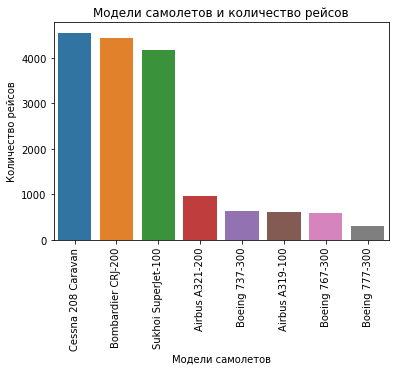

In [6]:
sn.barplot(x='model', y='flights_amount', data=data_1.sort_values(by='flights_amount', ascending=False))
plt.xlabel("Модели самолетов")
plt.ylabel("Количество рейсов")
plt.xticks(rotation=90)
plt.title('Модели самолетов и количество рейсов')
plt.show()

Наиболее популярные модели самолетов: Bombardier CRJ-200,	Cessna 208 Caravan, Sukhoi SuperJet-100. Самолеты этих моделей совершают перелетов в несколько раз больше остальных.

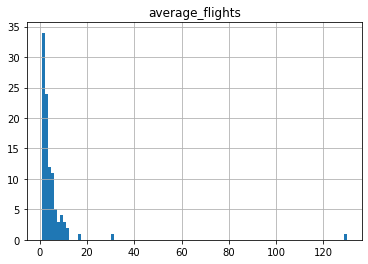

In [7]:
data_2.hist('average_flights', bins=101)
plt.show()

По гистограмме видно, что в большинстве городов совершается до 10-12 перелетов с день. При таком количестве городов график малоинформативен, но и по нему можно сделать тот же вывод. Есть выбивающиеся значения более 10 рейсов в день, но их немного.

### Топ-10 городов
<a id="top"></a>

Посмотрим как распределяется количество полётов в зависимости от аэропорта вылета.

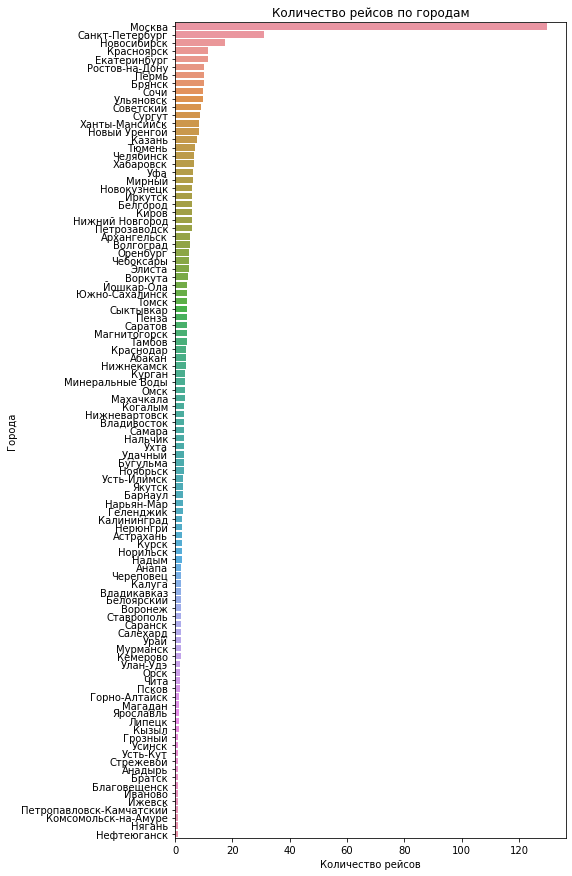

In [8]:
plt.figure(figsize=(7,15))
sn.barplot(x='average_flights', y='city', data=data_2.sort_values(by='average_flights', ascending=False))
plt.xlabel("Количество рейсов")
plt.ylabel("Города")
plt.title('Количество рейсов по городам')
plt.show()

In [9]:
data_2_top = data_2.sort_values(by='average_flights', ascending=False).head(10)
data_2_top

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


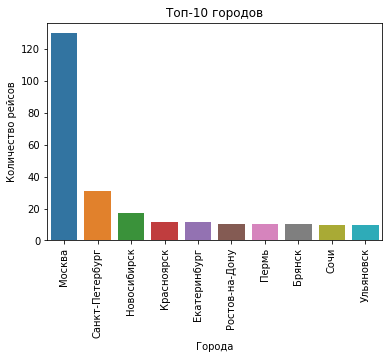

In [10]:
sn.barplot(x='city', y='average_flights', data=data_2_top)
plt.xlabel("Города")
plt.ylabel("Количество рейсов")
plt.xticks(rotation=90)
plt.title('Топ-10 городов')
plt.show()

Самый активный город - Москва. Санкт-Петербург отстаёт в 4 раза от Москвы, Новосибирск в 2 от Санкт-Петербурга. Остальные примерно на одном уровне с незначительной разницей.

## Общий вывод
<a id="conclusions"></a>

Наиболее популярные модели самолетов: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100. Самолеты этих моделей в сентябре 2018 года совершали в 4 раза больше больше рейсов, чем другие. Самый активный город в августе 2018 года - Москва. Санкт-Петербург отстаёт в 4 раза от Москвы, Новосибирск - в 2 от Санкт-Петербурга. 